In [3]:
!pip install tensorflow-gpu==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existin

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
## divide the dataset into dependent and independent features
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [12]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [15]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [16]:
x = pd.concat([x,geography,gender],axis=1)

In [17]:
## splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [19]:
## Feature scaling is required in ANN
from sklearn.preprocessing import StandardScaler


In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
x_train.shape

(8000, 11)

In [ ]:
## part 2 , Now lets create ANN

Tensorflow >> Google (deep mind team)

Pytorch >> facebook

we can do same things from both of them

tensorflow > 2.0 includes keras in it earier it was seperate and we had to install it one by one with keeping the version compativbality in mind.

Keras is a wrapper.





In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Sequential >> Consider a block which has an entire  
              neural network and we will be able to do forward and backward propogation with help of sequential.

Dense >> we will be able to create the input, hidden and
         output layers with the help of Dense

Activation functions >> LeakyRelu,ELU,PReLU,ReLU

Dropout >>To reduce the overfitting. 0.3 dropout means
          30% of the neurons in a specific layer will be deactivated hence it will be of no use and can be considered as diconnected with input layer

In [25]:
### Lets initialize the ANN
classifier=Sequential()

In [26]:
## adding the input layer
# hence we have 11 independent features

classifier.add(Dense(units = 11,activation = 'relu'))

In [27]:
## adding the first hidden layer (taking 7 neurons in first hidden layer)
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
# we can use dropout by below syntax

# classifier.add(Dense(units=7,activation='relu'))
# classifier.add(Dropout(0.2))

# both together as it is written

In [28]:
## adding 2nd hidden layer (taking 6 neurons in 2nd hidden layer)
classifier.add(Dense(units=6,activation='relu'))

In [29]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [31]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

## by default 'adam' uses a learning rate of 0.01
# if we want to use our own learning rate than

## import tendorflow
## opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.02)

## use above two lines and put opt in instead of 'adam' in first line of this cell

In [ ]:
# introducing early stopping>> it makes sures that when the accuracy is not at all increasing,
#                              automatically the training will stop

In [32]:
## Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [33]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 5ms/step - loss: 0.4986 - accuracy: 0.7876 - val_loss: 0.4507 - val_accuracy: 0.8061
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4279 - accuracy: 0.8203 - val_loss: 0.4293 - val_accuracy: 0.8145
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4080 - accuracy: 0.8293 - val_loss: 0.4155 - val_accuracy: 0.8190
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3912 - accuracy: 0.8371 - val_loss: 0.3965 - val_accuracy: 0.8334
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3725 - accuracy: 0.8457 - val_loss: 0.3803 - val_accuracy: 0.8421
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3558 - accuracy: 0.8571 - val_loss: 0.3725 - val_accuracy: 0.8474
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3457 - accuracy: 0.8582 - val_loss: 0.3662 - val_accuracy:

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

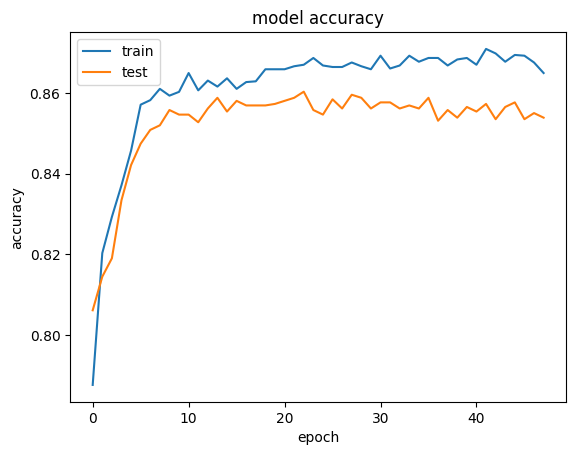

In [35]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

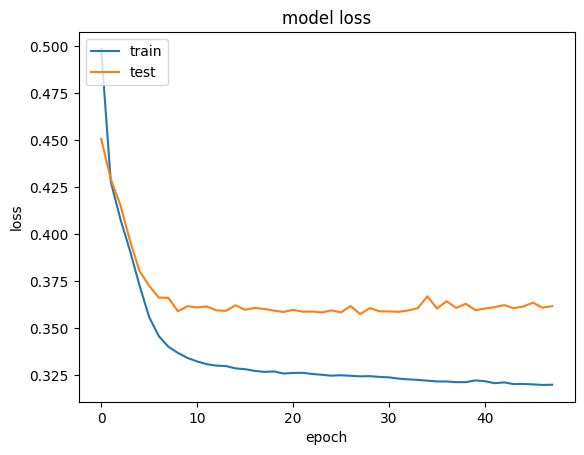

In [36]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
## Part 3 - Making the predictionsand evaluating the model

#Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [38]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[1499,   96],
       [ 200,  205]])

In [39]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [40]:
score

0.852

In [41]:
## get the weights and we can also store it in pickle files if requried

classifier.get_weights()

[array([[-0.08527191, -0.01796386, -0.10043146,  0.02055346,  0.06227118,
          0.22148897,  0.08005054,  0.39078656,  0.17111093,  0.14065866,
         -0.11634709],
        [ 0.27898714, -0.46826246,  0.545467  , -0.028425  , -0.8723885 ,
          0.81887716,  0.46290335, -0.32190934,  0.06441937, -0.30752072,
         -0.32674104],
        [-0.0219993 ,  0.02674763,  0.08158911, -0.25013083, -0.04193357,
          0.09537213,  0.24207172, -0.26450732,  0.21644983,  0.49149486,
         -0.28521746],
        [-0.17336872,  0.0457442 , -0.4334723 ,  0.05133077, -0.13797164,
          0.29851222, -0.30703425,  0.38405934, -0.4084109 , -0.7029386 ,
          0.0718869 ],
        [ 0.01753781,  1.2798606 , -0.8066379 , -0.7373423 ,  0.0046893 ,
          0.8102522 , -0.08180053, -0.29966798, -0.09078555, -0.13534345,
          0.3571225 ],
        [-0.22566283, -0.46193567,  0.0229057 , -0.14528862, -0.035457  ,
          0.11797106,  0.02552355,  0.19206776,  0.5443336 , -0.6972292